<a href="https://colab.research.google.com/github/a6iyyu/MachineLearning_3F_23/blob/main/Q1/KUIS1_2341720115_Rafi%20Abiyyu%20Airlangga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [48]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [49]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [50]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [51]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
# Data Size
df.shape

(48842, 15)

In [53]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [54]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Membuat salinan untuk menghindari modifikasi dari dataframe orisinil
df_cleaned = df.copy()

# Mengganti '?' dengan NaN untuk menangani nilai yang hilang
df_cleaned.replace('?', np.nan, inplace=True)

# Menghitung jumlah nilai yang hilang untuk setiap fitur
missing_values = df_cleaned.isnull().sum()

# Menampilkan hanya kolom yang mempunyai nilai hilang
print("Jumlah nilai yang hilang untuk setiap fitur:")
print(missing_values[missing_values > 0])

Jumlah nilai yang hilang untuk setiap fitur:
workclass         2799
occupation        2809
native-country     857
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [55]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Lakukan imputasi pada kolom dengan nilai yang hilang
# 'workclass'
workclass_mode = df_cleaned['workclass'].mode()[0]
df_cleaned['workclass'].fillna(workclass_mode, inplace=True)

# 'occupation'
occupation_mode = df_cleaned['occupation'].mode()[0]
df_cleaned['occupation'].fillna(occupation_mode, inplace=True)

# 'native-country'
native_country_mode = df_cleaned['native-country'].mode()[0]
df_cleaned['native-country'].fillna(native_country_mode, inplace=True)

# Cek kembali apakah masih ada nilai yang hilang
print("Pengecekan nilai yang hilang setelah imputasi:")
print(df_cleaned.isnull().sum())

Pengecekan nilai yang hilang setelah imputasi:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-2842998663.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['workclass'].fillna(workclass_mode, inplace=True)
/tmp/ipython-input-2842998663.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [56]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Inspeksi nilai unik pada kolom 'income' sebelum dibersihkan
print("Nilai unik pada kolom 'income' SEBELUM pembersihan:")
print(df_cleaned['income'].unique())

# Lakukan penyesuaian pada nilai yang salah tulis
df_cleaned['income'] = df_cleaned['income'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})

# Inspeksi kembali nilai unik untuk memastikan sudah benar
print("\nNilai unik pada kolom 'income' SETELAH pembersihan:")
print(df_cleaned['income'].unique())

Nilai unik pada kolom 'income' SEBELUM pembersihan:
['<=50K' '>50K' '<=50K.' '>50K.']

Nilai unik pada kolom 'income' SETELAH pembersihan:
['<=50K' '>50K']


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

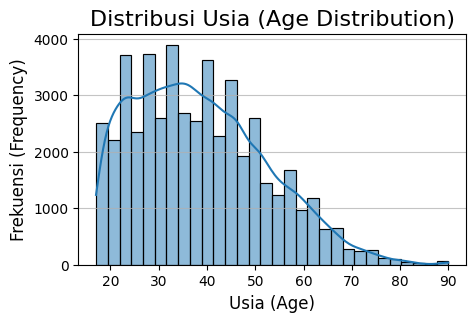

In [57]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(5, 3))
sns.histplot(df_cleaned['age'], bins=30, kde=True)
plt.title('Distribusi Usia (Age Distribution)', fontsize=16)
plt.xlabel('Usia (Age)', fontsize=12)
plt.ylabel('Frekuensi (Frequency)', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

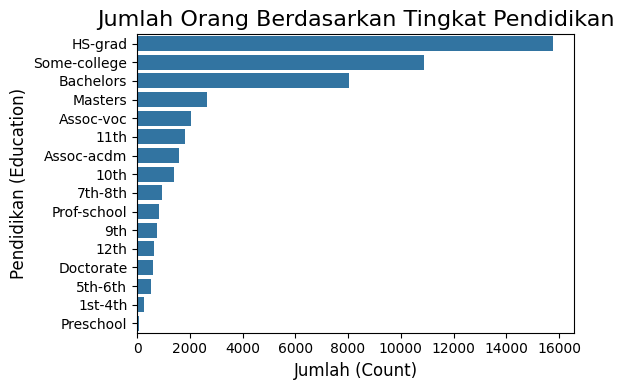

In [58]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(6, 4))

# Membuat plot secara horizontal agar label mudah dibaca
sns.countplot(y='education', data=df_cleaned, order = df_cleaned['education'].value_counts().index)
plt.title('Jumlah Orang Berdasarkan Tingkat Pendidikan', fontsize=16)
plt.xlabel('Jumlah (Count)', fontsize=12)
plt.ylabel('Pendidikan (Education)', fontsize=12)
plt.tight_layout() # Merapikan layout
plt.show()

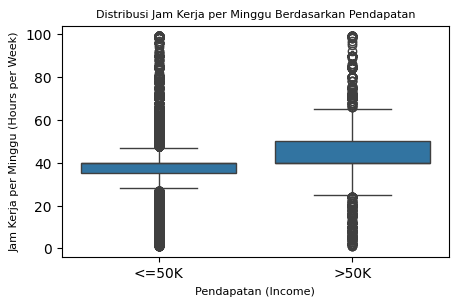

In [59]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x='income', y='hours-per-week', data=df_cleaned)
plt.title('Distribusi Jam Kerja per Minggu Berdasarkan Pendapatan', fontsize=8)
plt.xlabel('Pendapatan (Income)', fontsize=8)
plt.ylabel('Jam Kerja per Minggu (Hours per Week)', fontsize=8)
plt.show()

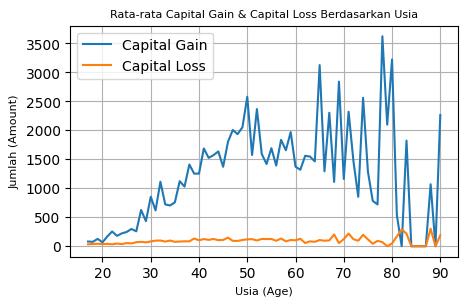

In [60]:
# Jawab 1.4 - Lineplot

# Kelompokkan data berdasarkan usia dan hitung rata-ratanya
age_analysis = df_cleaned.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(5, 3))
sns.lineplot(x='age', y='capital-gain', data=age_analysis, label='Capital Gain')
sns.lineplot(x='age', y='capital-loss', data=age_analysis, label='Capital Loss')

plt.title('Rata-rata Capital Gain & Capital Loss Berdasarkan Usia', fontsize=8)
plt.xlabel('Usia (Age)', fontsize=8)
plt.ylabel('Jumlah (Amount)', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [61]:
'''
1. Fenomena pada Distribusi Usia (Age)
   - Distribusi data 'age' berbentuk **Right-Skewed (condong ke kanan)**.
   - Artinya, mayoritas individu dalam dataset berada pada rentang usia muda hingga produktif (sekitar 20-45 tahun).
   - Jumlah individu cenderung menurun secara signifikan seiring dengan bertambahnya usia. Fenomena ini wajar karena dataset ini merepresentasikan populasi angkatan kerja.

2. Strategi Imputasi untuk Data 'age' yang Hilang
   - Jika terdapat data yang hilang pada kolom 'age', strategi terbaik adalah menggunakan **Median**.
   - **Alasan**: Karena distribusinya tidak normal (condong ke kanan), median menjadi ukuran pusat yang lebih baik (robust) dibandingkan mean (rata-rata). Mean akan terpengaruh oleh nilai-nilai ekstrem (usia yang sangat tua), sementara median tidak.

3. Jumlah Outlier pada 'hours-per-week' Berdasarkan 'income'
   - Berdasarkan perhitungan menggunakan metode IQR (Interquartile Range), jumlah outlier adalah sebagai berikut:
     - Kategori '<=50K': Terdapat **9,934 outlier**.
     - Kategori '>50K': Terdapat **3,553 outlier**.
   - Kategori yang memiliki outlier paling banyak adalah **'<=50K'**. Ini menunjukkan bahwa pada kelompok pendapatan rendah, variasi jam kerja per minggu (baik sangat sedikit maupun sangat banyak) jauh lebih besar dibandingkan kelompok pendapatan tinggi.

'''

"\n1. Fenomena pada Distribusi Usia (Age)\n   - Distribusi data 'age' berbentuk **Right-Skewed (condong ke kanan)**.\n   - Artinya, mayoritas individu dalam dataset berada pada rentang usia muda hingga produktif (sekitar 20-45 tahun).\n   - Jumlah individu cenderung menurun secara signifikan seiring dengan bertambahnya usia. Fenomena ini wajar karena dataset ini merepresentasikan populasi angkatan kerja.\n\n2. Strategi Imputasi untuk Data 'age' yang Hilang\n   - Jika terdapat data yang hilang pada kolom 'age', strategi terbaik adalah menggunakan **Median**.\n   - **Alasan**: Karena distribusinya tidak normal (condong ke kanan), median menjadi ukuran pusat yang lebih baik (robust) dibandingkan mean (rata-rata). Mean akan terpengaruh oleh nilai-nilai ekstrem (usia yang sangat tua), sementara median tidak.\n\n3. Jumlah Outlier pada 'hours-per-week' Berdasarkan 'income'\n   - Berdasarkan perhitungan menggunakan metode IQR (Interquartile Range), jumlah outlier adalah sebagai berikut:\n     

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [62]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Tampilkan nilai sebelum encoding
print("Nilai unik 'sex' SEBELUM encoding:", df_cleaned['sex'].unique())
print("Nilai unik 'income' SEBELUM encoding:", df_cleaned['income'].unique())

# Lakukan encoding menggunakan metode mapping
df_cleaned['sex'] = df_cleaned['sex'].replace({'Male': 1, 'Female': 0})
df_cleaned['income'] = df_cleaned['income'].replace({'<=50K': 0, '>50K': 1})

# Tampilkan nilai setelah encoding untuk verifikasi
print("\nNilai unik 'sex' SETELAH encoding:", df_cleaned['sex'].unique())
print("Nilai unik 'income' SETELAH encoding:", df_cleaned['income'].unique())

# Tampilkan 5 baris pertama dari kolom yang sudah di-encode
print("\nHasil encoding pada 5 baris pertama:")
print(df_cleaned[['sex', 'income']].head())

Nilai unik 'sex' SEBELUM encoding: ['Male' 'Female']
Nilai unik 'income' SEBELUM encoding: ['<=50K' '>50K']

Nilai unik 'sex' SETELAH encoding: [1 0]
Nilai unik 'income' SETELAH encoding: [0 1]

Hasil encoding pada 5 baris pertama:
   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


/tmp/ipython-input-1600445420.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['sex'] = df_cleaned['sex'].replace({'Male': 1, 'Female': 0})
/tmp/ipython-input-1600445420.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['income'] = df_cleaned['income'].replace({'<=50K': 0, '>50K': 1})


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

Matriks Korelasi:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


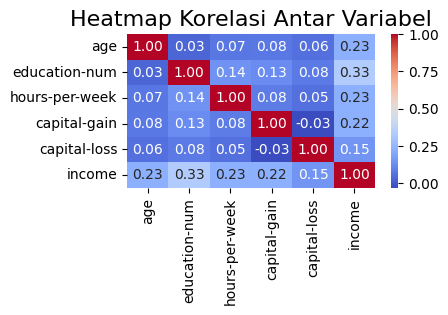

In [63]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Pilih kolom yang akan dianalisis
columns_for_corr = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
correlation_df = df_cleaned[columns_for_corr]

# Hitung matriks korelasi
correlation_matrix = correlation_df.corr()

# Tampilkan matriks korelasi dalam bentuk tabel
print("Matriks Korelasi:")
print(correlation_matrix)

# Visualisasikan matriks korelasi dengan heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel', fontsize=16)
plt.show()

In [64]:
# Hasil analisis jelaskan pada cell ini

'''
Berdasarkan hasil analisis korelasi, khususnya pada hubungan setiap variabel dengan variabel target ('income'), dapat diinterpretasikan sebagai berikut:

1.  **Korelasi Positif**: Semua variabel yang dianalisis memiliki korelasi positif dengan 'income'. Ini berarti, secara umum, peningkatan nilai pada variabel-variabel ini cenderung diikuti dengan peningkatan kemungkinan seseorang memiliki pendapatan >50K.

2.  **education-num (0.34)**: Variabel ini memiliki **korelasi positif paling kuat** dengan 'income'. Hal ini mengindikasikan bahwa tingkat pendidikan adalah faktor linear yang paling berpengaruh terhadap pendapatan. Semakin tinggi tingkat pendidikan seseorang, semakin besar kemungkinannya untuk memiliki pendapatan di atas 50K.

3.  **age (0.23)**: Terdapat **korelasi positif sedang**. Artinya, seiring bertambahnya usia, seseorang cenderung memiliki pendapatan yang lebih tinggi, kemungkinan karena akumulasi pengalaman kerja.

4.  **hours-per-week (0.23)**: Terdapat **korelasi positif sedang**. Ini menunjukkan bahwa semakin banyak jam kerja per minggu, semakin besar pula kemungkinan untuk mendapatkan penghasilan di atas 50K.

5.  **capital-gain (0.22)**: Menunjukkan **korelasi positif sedang**. Individu dengan keuntungan modal (investasi) yang lebih tinggi cenderung berada di kelompok pendapatan yang lebih tinggi.

6.  **capital-loss (0.15)**: Menunjukkan **korelasi positif yang lebih lemah** dibandingkan variabel lainnya. Ini bisa diartikan bahwa individu yang mengalami kerugian modal (yang berarti mereka memiliki modal untuk diinvestasikan) juga cenderung berada di kelompok pendapatan yang lebih tinggi.

**Kesimpulan Utama**: Dari semua variabel yang diuji, **tingkat pendidikan ('education-num')** adalah prediktor linear terkuat untuk menentukan apakah pendapatan seseorang akan melebihi 50K per tahun.
'''

"\nBerdasarkan hasil analisis korelasi, khususnya pada hubungan setiap variabel dengan variabel target ('income'), dapat diinterpretasikan sebagai berikut:\n\n1.  **Korelasi Positif**: Semua variabel yang dianalisis memiliki korelasi positif dengan 'income'. Ini berarti, secara umum, peningkatan nilai pada variabel-variabel ini cenderung diikuti dengan peningkatan kemungkinan seseorang memiliki pendapatan >50K.\n\n2.  **education-num (0.34)**: Variabel ini memiliki **korelasi positif paling kuat** dengan 'income'. Hal ini mengindikasikan bahwa tingkat pendidikan adalah faktor linear yang paling berpengaruh terhadap pendapatan. Semakin tinggi tingkat pendidikan seseorang, semakin besar kemungkinannya untuk memiliki pendapatan di atas 50K.\n\n3.  **age (0.23)**: Terdapat **korelasi positif sedang**. Artinya, seiring bertambahnya usia, seseorang cenderung memiliki pendapatan yang lebih tinggi, kemungkinan karena akumulasi pengalaman kerja.\n\n4.  **hours-per-week (0.23)**: Terdapat **kore

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [65]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


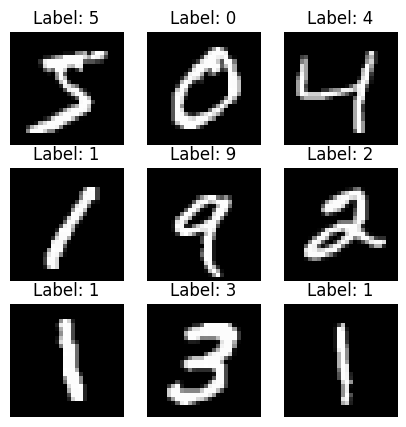

In [66]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [67]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2 # Library untuk pemrosesan citra

# 1. Lakukan proses upsampling citra menjadi ukuran 32x32

# Buat list kosong untuk menampung hasil upsampling
X_test_upsampled_list = []
new_size = (32, 32)

# Lakukan perulangan pada setiap citra di X_test
for i in range(X_test.shape[0]):
    # Ambil satu citra
    img = X_test[i]
    # Ubah ukuran citra menggunakan cv2.resize
    resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR)
    # Tambahkan citra yang sudah diubah ukurannya ke dalam list
    X_test_upsampled_list.append(resized_img)

# Konversi list menjadi numpy array
X_test_upsampled = np.array(X_test_upsampled_list)

# Cek bentuk (shape) dari data yang baru untuk memastikan proses berhasil
print("Bentuk X_test sebelum upsampling:", X_test.shape)
print("Bentuk X_test setelah upsampling:", X_test_upsampled.shape)

Bentuk X_test sebelum upsampling: (10000, 28, 28)
Bentuk X_test setelah upsampling: (10000, 32, 32)



Menampilkan 5 citra pertama hasil upsampling (32x32):


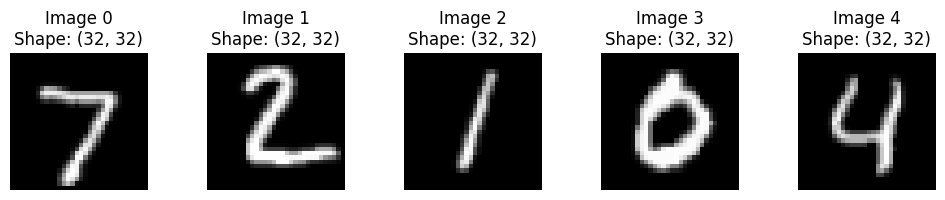

In [68]:
# 2. Tampilkan 5 data hasil proses upsampling
print("\nMenampilkan 5 citra pertama hasil upsampling (32x32):")

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f"Image {i}\nShape: {X_test_upsampled[i].shape}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [69]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Sebelum normalisasi, ubah tipe data menjadi float untuk proses pembagian
X_test_normalized = X_test_upsampled.astype('float32')

# Lakukan normalisasi dengan membagi setiap piksel dengan 255
X_test_normalized /= 255.0

# Verifikasi hasil normalisasi
min_val = X_test_normalized.min()
max_val = X_test_normalized.max()

print(f"Tipe data setelah normalisasi: {X_test_normalized.dtype}")
print(f"Nilai piksel minimum setelah normalisasi: {min_val}")
print(f"Nilai piksel maksimum setelah normalisasi: {max_val}")

# Tampilkan nilai piksel dari satu citra untuk perbandingan
print("\nContoh nilai piksel citra pertama SEBELUM normalisasi (sebagian):")
print(X_test_upsampled[0, 10:15, 10:15]) # Menampilkan sebagian kecil dari matriks

print("\nContoh nilai piksel citra pertama SETELAH normalisasi (sebagian):")
print(X_test_normalized[0, 10:15, 10:15]) # Menampilkan bagian yang sama

Tipe data setelah normalisasi: float32
Nilai piksel minimum setelah normalisasi: 0.0
Nilai piksel maksimum setelah normalisasi: 1.0

Contoh nilai piksel citra pertama SEBELUM normalisasi (sebagian):
[[149 177 209 233 233]
 [ 44  62  88 121 140]
 [  0   0   4  18  32]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]

Contoh nilai piksel citra pertama SETELAH normalisasi (sebagian):
[[0.58431375 0.69411767 0.81960785 0.9137255  0.9137255 ]
 [0.17254902 0.24313726 0.34509805 0.4745098  0.54901963]
 [0.         0.         0.01568628 0.07058824 0.1254902 ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [70]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Sesuai hint, buat list kosong untuk menampung hasilnya
X_test_flattened_list = []

# Lakukan perulangan pada setiap citra yang sudah dinormalisasi
for img in X_test_normalized:
    # Ubah matriks 2D menjadi array 1D (vektor) dengan .flatten()
    flattened_img = img.flatten()
    # Tambahkan vektor hasil flatten ke dalam list
    X_test_flattened_list.append(flattened_img)

# Konversi list yang berisi vektor-vektor citra menjadi sebuah numpy array
X_test_flattened = np.array(X_test_flattened_list)

# Verifikasi hasil flattening
print("Bentuk data SEBELUM di-flatten:", X_test_normalized.shape)
print("Bentuk data SETELAH di-flatten:", X_test_flattened.shape)

# Tampilkan bentuk dari satu vektor citra untuk memastikan
print("\nBentuk satu citra setelah di-flatten:", X_test_flattened[0].shape)

# Alternatif cara yang lebih cepat tanpa perulangan (untuk referensi):
# X_test_flattened_fast = X_test_normalized.reshape((X_test_normalized.shape[0], -1))
# print("\nBentuk data setelah di-flatten (cara cepat):", X_test_flattened_fast.shape)

Bentuk data SEBELUM di-flatten: (10000, 32, 32)
Bentuk data SETELAH di-flatten: (10000, 1024)

Bentuk satu citra setelah di-flatten: (1024,)
